In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/raw/laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [5]:
df.shape        # Rows and columns
df.info()       # Column types and nulls
df.describe()   # Statistics for numeric columns
df.columns      # List of column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0', 'Name'], axis=1)

In [7]:
df.isnull().sum()

Brand                0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [8]:
# Fill missing values in GPU and GPU_Brand with 'Unknown'
df['GPU'] = df['GPU'].fillna('Unknown')
df['GPU_Brand'] = df['GPU_Brand'].fillna('Unknown')

# Clean and convert Ghz
df['Ghz'] = df['Ghz'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)
df['Ghz'] = df['Ghz'].fillna(df['Ghz'].median())

# Clean and convert Battery_Life
df['Battery_Life'] = df['Battery_Life'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)
df['Battery_Life'] = df['Battery_Life'].fillna(df['Battery_Life'].median())

# Check to confirm all nulls are handled
print("Null values after cleaning:\n", df.isnull().sum())

Null values after cleaning:
 Brand              0
Price              0
Processor_Name     0
Processor_Brand    0
RAM_Expandable     0
RAM                0
RAM_TYPE           0
Ghz                0
Display_type       0
Display            0
GPU                0
GPU_Brand          0
SSD                0
HDD                0
Adapter            0
Battery_Life       0
dtype: int64


In [9]:
# Clean and convert numeric columns

df['RAM'] = df['RAM'].astype(str).str.extract('(\d+)').astype(int)
df['SSD'] = df['SSD'].replace('No SSD', '0').astype(str).str.extract('(\d+)').fillna(0).astype(int)
df['HDD'] = df['HDD'].replace('No HDD', '0').astype(str).str.extract('(\d+)').fillna(0).astype(int)
df['Ghz'] = df['Ghz'].astype(str).str.extract('(\d+\.\d+)').astype(float)
df['Battery_Life'] = df['Battery_Life'].astype(str).str.extract('(\d+\.\d+)').astype(float)

In [10]:
categorical_cols = ['Brand', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable', 'RAM_TYPE',
                    'Display_type', 'Display', 'GPU', 'GPU_Brand', 'Adapter']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Columns: 617 entries, Price to Adapter_no
dtypes: bool(611), float64(2), int64(4)
memory usage: 2.5 MB
None


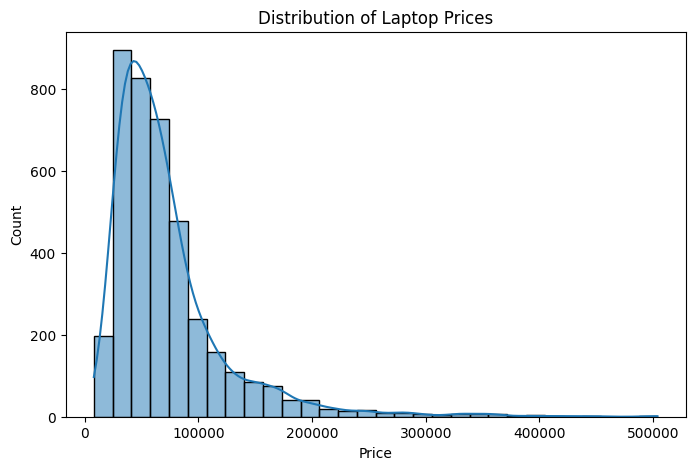

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

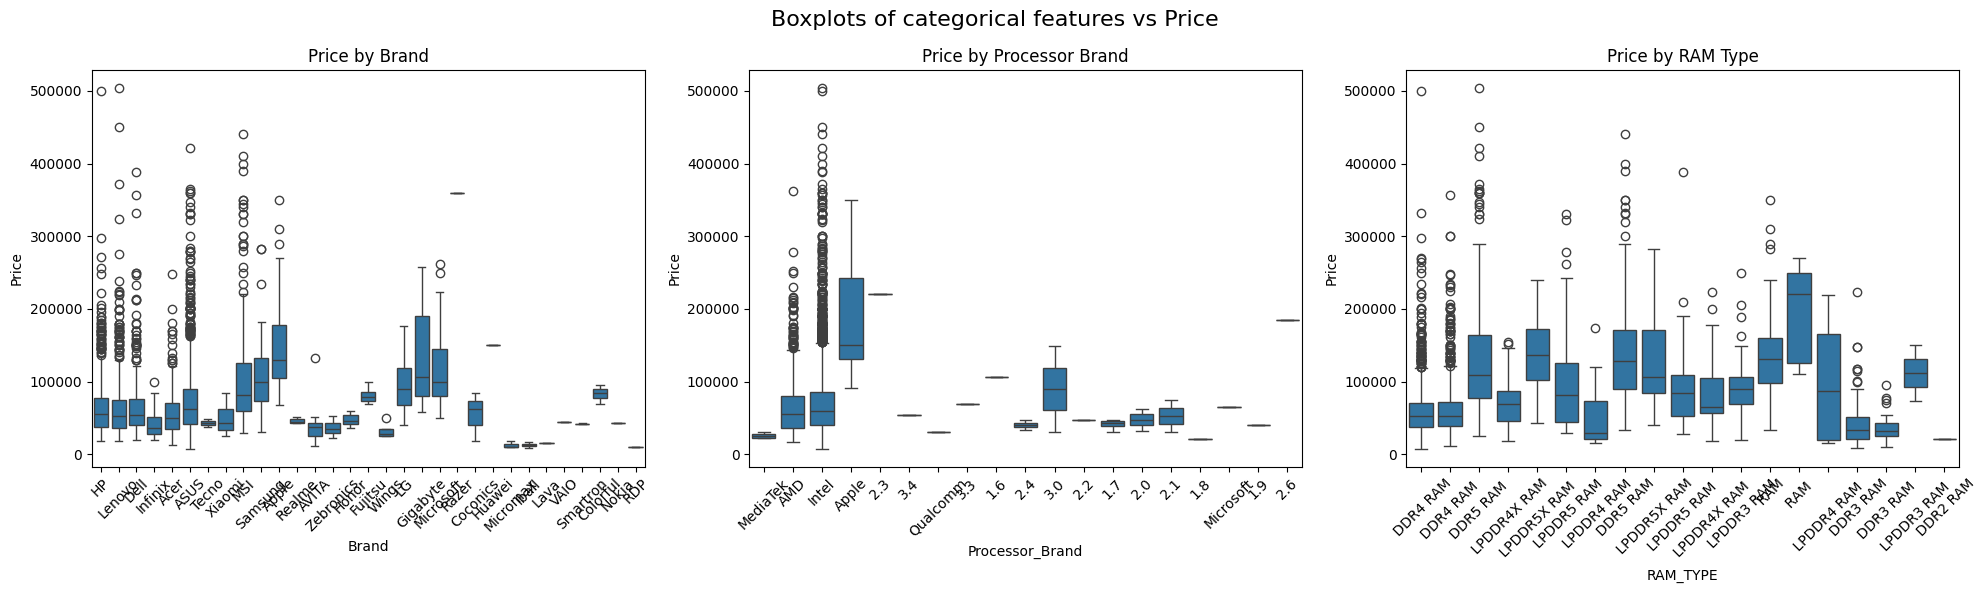

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Brand', y='Price', data=df, ax=axes[0])
axes[0].set_title('Price by Brand')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Processor_Brand', y='Price', data=df, ax=axes[1])
axes[1].set_title('Price by Processor Brand')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='RAM_TYPE', y='Price', data=df, ax=axes[2])
axes[2].set_title('Price by RAM Type')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
fig.suptitle("Boxplots of categorical features vs Price", fontsize=16)
plt.subplots_adjust(top=0.88)  
plt.show()


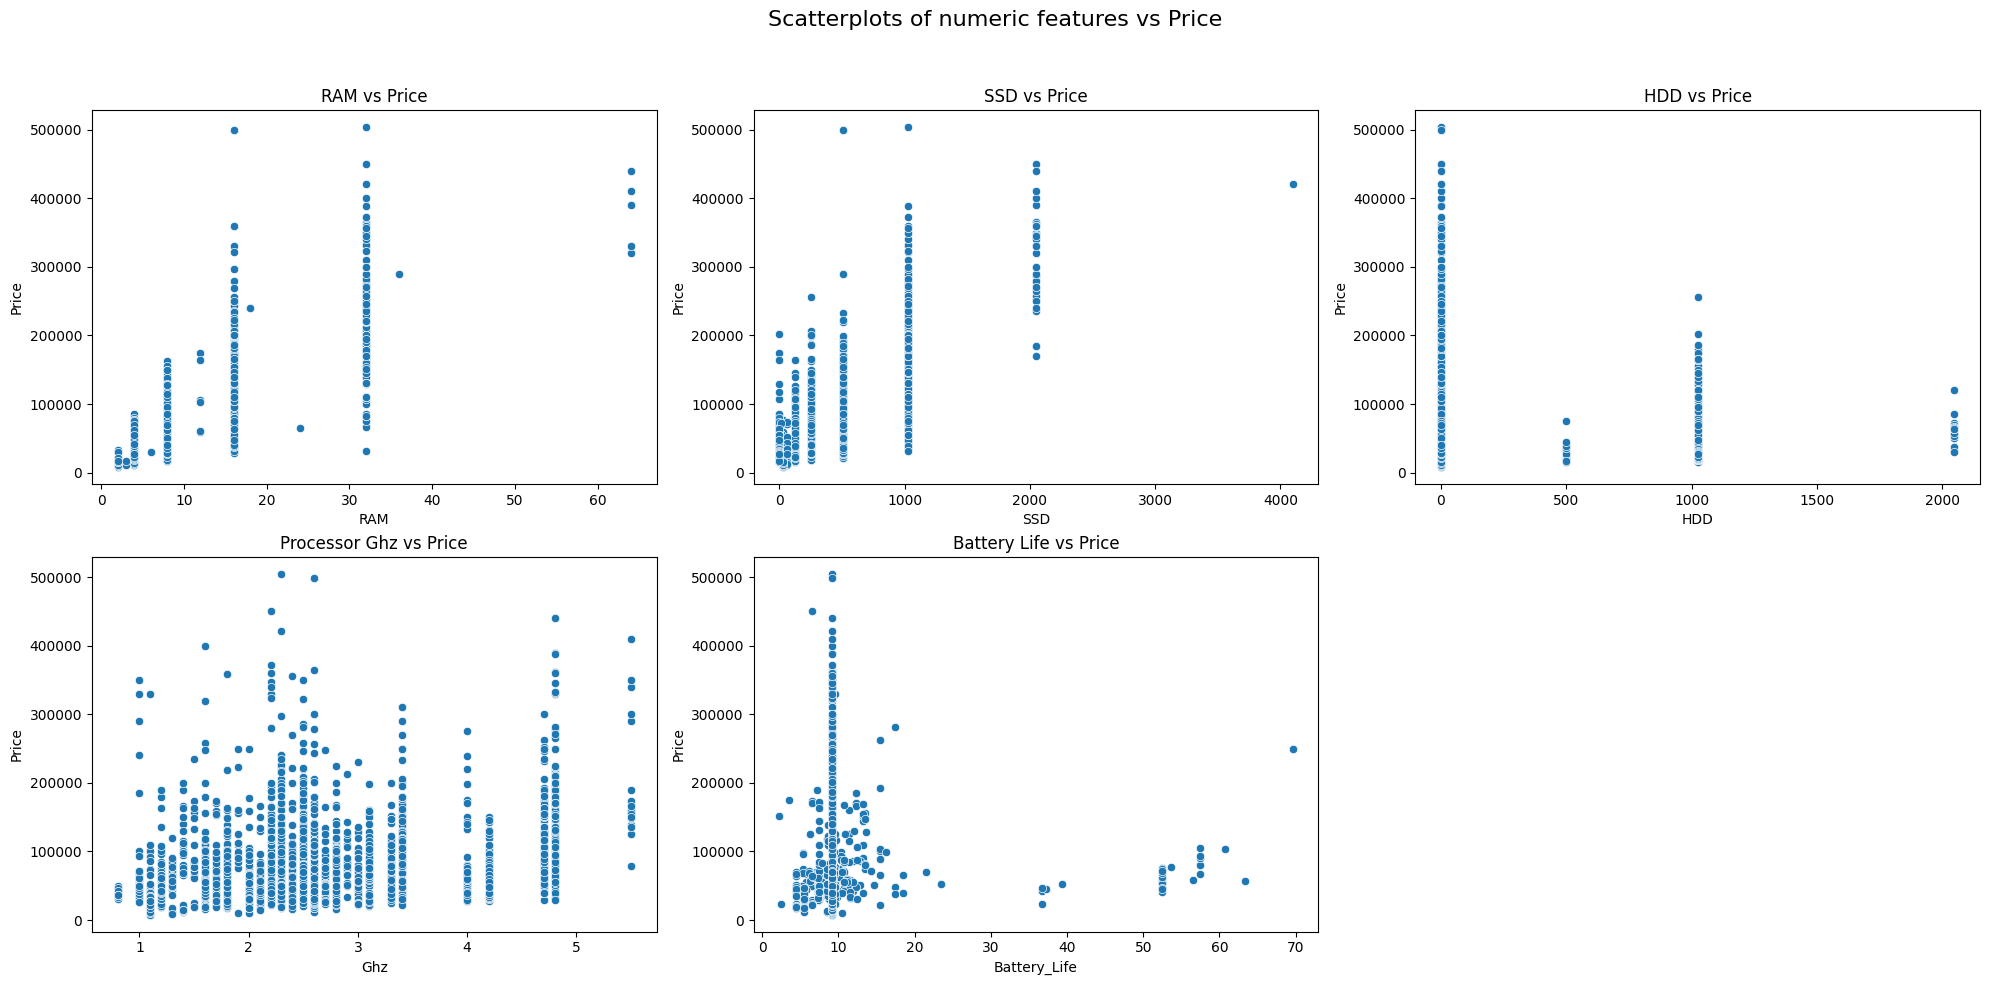

In [13]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot 1: RAM vs Price
sns.scatterplot(x='RAM', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('RAM vs Price')

# Plot 2: SSD vs Price
sns.scatterplot(x='SSD', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('SSD vs Price')

# Plot 3: HDD vs Price
sns.scatterplot(x='HDD', y='Price', data=df, ax=axes[0, 2])
axes[0, 2].set_title('HDD vs Price')

# Plot 4: Ghz vs Price
sns.scatterplot(x='Ghz', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Processor Ghz vs Price')

# Plot 5: Battery_Life vs Price
sns.scatterplot(x='Battery_Life', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Battery Life vs Price')

# Optional: Leave 6th plot blank or add something else
axes[1, 2].axis('off')  # if not using this cell

plt.tight_layout()
fig.suptitle("Scatterplots of numeric features vs Price", fontsize=16)
plt.subplots_adjust(top=0.88)  
plt.show()

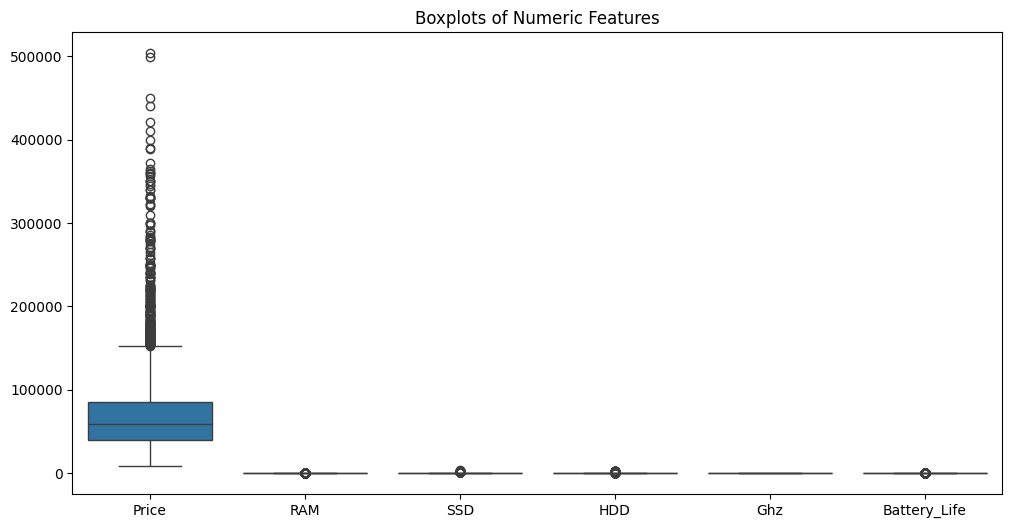

In [14]:
numeric_cols = ['Price', 'RAM', 'SSD', 'HDD', 'Ghz', 'Battery_Life']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplots of Numeric Features')
plt.show()

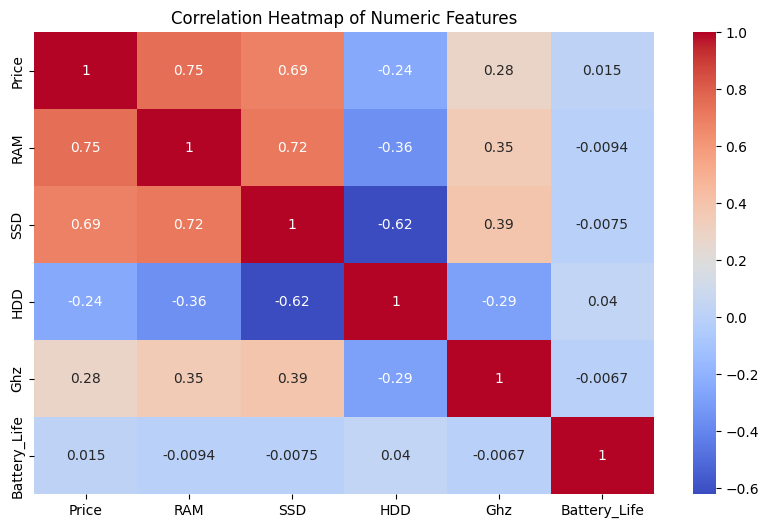

In [15]:
numeric_cols = ['Price', 'RAM', 'SSD', 'HDD', 'Ghz', 'Battery_Life']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [16]:
print(df[numeric_cols].describe())

               Price          RAM          SSD          HDD          Ghz  \
count    3976.000000  3976.000000  3976.000000  3976.000000  3976.000000   
mean    72432.528672    11.150402   462.006791   246.332243     2.745423   
std     52207.650948     6.364446   347.530568   445.650930     1.100522   
min      7990.000000     2.000000     0.000000     0.000000     0.800000   
25%     39873.250000     8.000000   256.000000     0.000000     2.000000   
50%     58990.000000     8.000000   512.000000     0.000000     2.500000   
75%     84990.000000    16.000000   512.000000     0.000000     3.400000   
max    503890.000000    64.000000  4098.000000  2048.000000     5.500000   

       Battery_Life  
count   3976.000000  
mean       9.473471  
std        3.939667  
min        2.250000  
25%        9.150000  
50%        9.150000  
75%        9.150000  
max       69.600000  


In [17]:
df_encoded.to_csv("cleaned_laptop_data.csv", index=False)